In [5]:
# In[3]:

import datetime

import matplotlib.pyplot as plt
import matplotlib.colors as mpl_colors
import matplotlib.colorbar as mpl_colorbar

import netCDF4 as nc
import numpy as np
from salishsea_tools import geo_tools

get_ipython().magic('matplotlib inline')

mon_s = input("Month (ex:sep): ")
#step = input("Time step in minutes(ex:30): ")

step = int(step)

# In[4]:

#End of spit
late = 49.205
lone = -123.26
#Further up spit
lats = 49.214
lons = -123.22

deep = 110
shallow = 35


# In[9]:

bathy = nc.Dataset("/home/gsgarbi/analysis-giorgio/sequential/"+mon_s+'/bathy_meter_SalishSea2.nc')
model_lats = bathy.variables['nav_lat'][:]
model_lons = bathy.variables['nav_lon'][:]
depth = bathy.variables['Bathymetry'][:]


# In[ ]:

dx = 1.2
lat = late + dx * (late - lats)
lon = lone + dx * (lone - lons)
y, x = geo_tools.find_closest_model_point(lon, lat, model_lons, model_lats)
#print(depth[y, x])
#print(y, x)
#print('And in Fortran for ariane', y + 1, x + 1)
# point I used
outy = y - 1
outx = x - 1
#print('Point I used', outx, outy)



Month (ex:sep): mar


In [12]:
# In[ ]:

#ugrid = nc.Dataset('')
#darray = ugrid.variables['depth'][:]
#print (darray[27-1])
#uvel = ugrid.variables['uVelocity'][:]
#print (uvel.shape)


In [13]:
#correct trajectory:
#traj = np.loadtxt('09apr16/traj_2016apr17-2.txt', delimiter=' ')

#trajectory from Ariane:
traj = np.loadtxt("/home/gsgarbi/analysis-giorgio/sequential/"+mon_s+'/traj.txt', delimiter = ' ')
print (traj[0])
print (traj.shape)

[   1.      -123.30807   49.19026  -98.35227    0.     ]
(3894, 5)


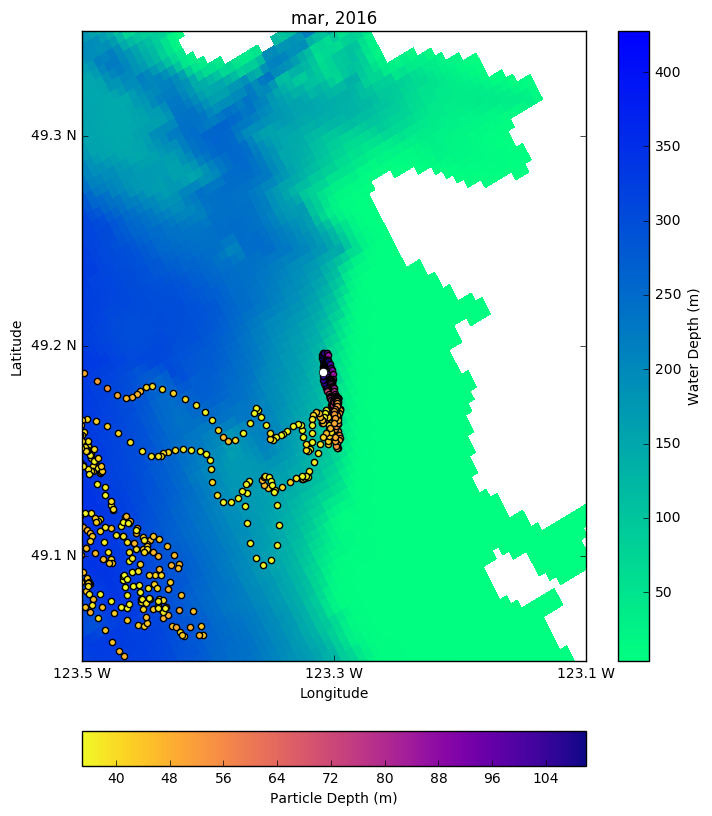

In [16]:
#5 particles, 2 weeks, variable depths

traj = np.loadtxt("/home/gsgarbi/analysis-giorgio/sequential/"+mon_s+'/traj.txt', delimiter = ' ')
step = 1 #for plotting purposes only


fig = plt.figure(figsize=(7, 7))
ax1 = fig.add_axes([0.05, 0.00, 0.72, 0.05])
ax = fig.add_axes([0.05, 0.15, 0.9, 0.9])
mesh = ax.pcolormesh(model_lons, model_lats, depth, cmap='winter_r')
ax.set_xlim((-123.5, -123.1))
ax.set_ylim((49.05, 49.35))


for i in range(traj.shape[0]):
    scaled_z = 1-(deep + traj[i, 3]) / (deep - shallow)
    cmap = plt.cm.plasma_r
    color = cmap(scaled_z)
    if i % step == 0 and traj[i,0] <3:
        ax.scatter(traj[i, 1], traj[i, 2], c=color)
norm = mpl_colors.Normalize(vmin=deep, vmax=shallow)
cb1 = mpl_colorbar.ColorbarBase(ax1, cmap=cmap, norm=norm, orientation='horizontal')
cb1.set_label('Particle Depth (m)')
ax.plot(model_lons[outy, outx], model_lats[outy, outx], 'wo')
ax.set_yticks((49.1, 49.2, 49.3))
ax.set_yticklabels(('49.1 N', '49.2 N', '49.3 N'))
ax.set_ylabel('Latitude')
cb = fig.colorbar(mesh, ax=ax)
cb.set_label('Water Depth (m)')

ax.set_xticks((-123.5, -123.3, -123.1))
ax.set_xticklabels(('123.5 W', '123.3 W', '123.1 W'))
ax.set_xlabel('Longitude')

ax.set_title(mon_s+', 2016');


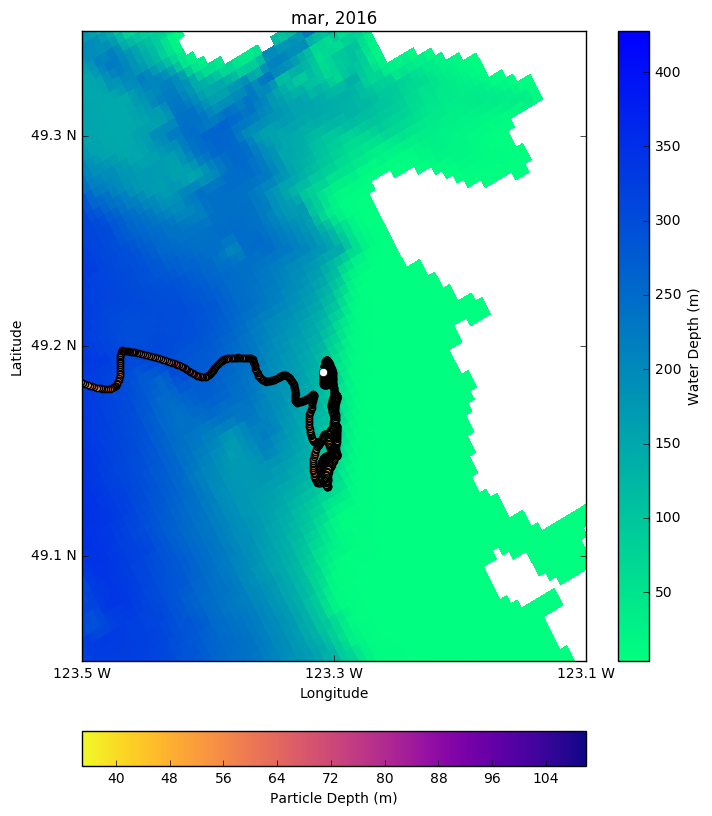

In [21]:
# 10min

traj = np.loadtxt(mon_s+'/traj.txt', delimiter = ' ')
fig = plt.figure(figsize=(7, 7))
ax1 = fig.add_axes([0.05, 0.00, 0.72, 0.05])
ax = fig.add_axes([0.05, 0.15, 0.9, 0.9])
mesh = ax.pcolormesh(model_lons, model_lats, depth, cmap='winter_r')
ax.set_xlim((-123.5, -123.1))
ax.set_ylim((49.05, 49.35))


for i in range(traj.shape[0]):
    scaled_z = 1-(deep + traj[i, 3]) / (deep - shallow)
    cmap = plt.cm.plasma_r
    color = cmap(scaled_z)
    if i % 10 == 0:
        ax.scatter(traj[i, 1], traj[i, 2], c=color)
norm = mpl_colors.Normalize(vmin=deep, vmax=shallow)
cb1 = mpl_colorbar.ColorbarBase(
    ax1, cmap=cmap, norm=norm, orientation='horizontal')
cb1.set_label('Particle Depth (m)')
ax.plot(model_lons[outy, outx], model_lats[outy, outx], 'wo')
ax.set_yticks((49.1, 49.2, 49.3))
ax.set_yticklabels(('49.1 N', '49.2 N', '49.3 N'))
ax.set_ylabel('Latitude')
cb = fig.colorbar(mesh, ax=ax)
cb.set_label('Water Depth (m)')

ax.set_xticks((-123.5, -123.3, -123.1))
ax.set_xticklabels(('123.5 W', '123.3 W', '123.1 W'))
ax.set_xlabel('Longitude')

ax.set_title(mon_s+', 2016');


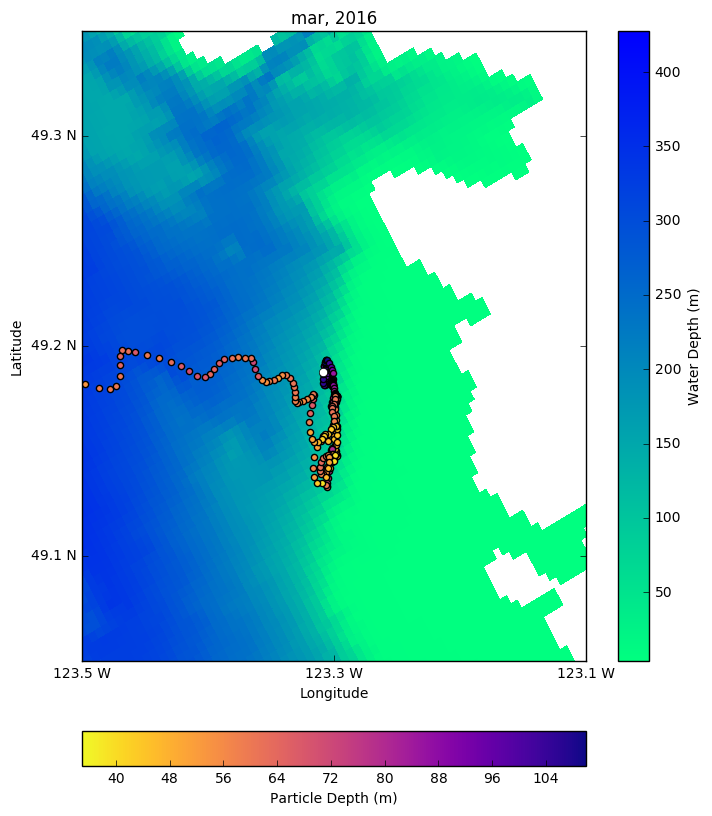

In [17]:
# 60min
traj = np.loadtxt(mon_s+'/trajectories/traj.txt', delimiter = ' ')
fig = plt.figure(figsize=(7, 7))
ax1 = fig.add_axes([0.05, 0.00, 0.72, 0.05])
ax = fig.add_axes([0.05, 0.15, 0.9, 0.9])
mesh = ax.pcolormesh(model_lons, model_lats, depth, cmap='winter_r')
ax.set_xlim((-123.5, -123.1))
ax.set_ylim((49.05, 49.35))


for i in range(traj.shape[0]):
    scaled_z = 1-(deep + traj[i, 3]) / (deep - shallow)
    cmap = plt.cm.plasma_r
    color = cmap(scaled_z)
    if traj[i,0] == 1:
        ax.scatter(traj[i, 1], traj[i, 2], c=color)
norm = mpl_colors.Normalize(vmin=deep, vmax=shallow)
cb1 = mpl_colorbar.ColorbarBase(
    ax1, cmap=cmap, norm=norm, orientation='horizontal')
cb1.set_label('Particle Depth (m)')
ax.plot(model_lons[outy, outx], model_lats[outy, outx], 'wo')
ax.set_yticks((49.1, 49.2, 49.3))
ax.set_yticklabels(('49.1 N', '49.2 N', '49.3 N'))
ax.set_ylabel('Latitude')
cb = fig.colorbar(mesh, ax=ax)
cb.set_label('Water Depth (m)')

ax.set_xticks((-123.5, -123.3, -123.1))
ax.set_xticklabels(('123.5 W', '123.3 W', '123.1 W'))
ax.set_xlabel('Longitude')

ax.set_title(mon_s+', 2016');
# In[ ]:

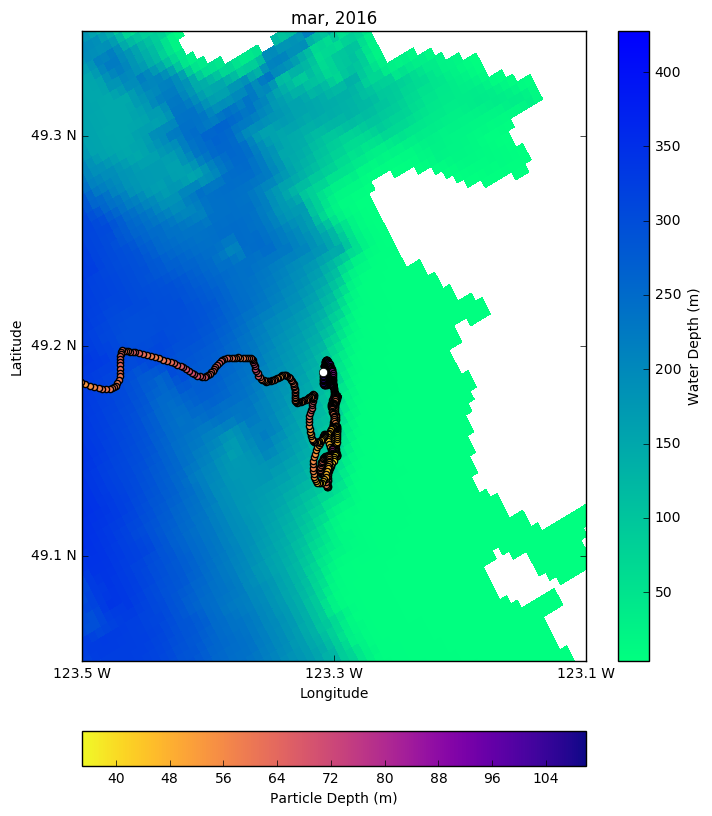

In [24]:
traj = np.loadtxt(mon_s+'/traj.txt', delimiter = ' ')
fig = plt.figure(figsize=(7, 7))
ax1 = fig.add_axes([0.05, 0.00, 0.72, 0.05])
ax = fig.add_axes([0.05, 0.15, 0.9, 0.9])
mesh = ax.pcolormesh(model_lons, model_lats, depth, cmap='winter_r')
ax.set_xlim((-123.5, -123.1))
ax.set_ylim((49.05, 49.35))


for i in range(traj.shape[0]):
    scaled_z = 1-(deep + traj[i, 3]) / (deep - shallow)
    cmap = plt.cm.plasma_r
    color = cmap(scaled_z)
    if i % 20 == 0:
        ax.scatter(traj[i, 1], traj[i, 2], c=color)
norm = mpl_colors.Normalize(vmin=deep, vmax=shallow)
cb1 = mpl_colorbar.ColorbarBase(
    ax1, cmap=cmap, norm=norm, orientation='horizontal')
cb1.set_label('Particle Depth (m)')
ax.plot(model_lons[outy, outx], model_lats[outy, outx], 'wo')
ax.set_yticks((49.1, 49.2, 49.3))
ax.set_yticklabels(('49.1 N', '49.2 N', '49.3 N'))
ax.set_ylabel('Latitude')
cb = fig.colorbar(mesh, ax=ax)
cb.set_label('Water Depth (m)')

ax.set_xticks((-123.5, -123.3, -123.1))
ax.set_xticklabels(('123.5 W', '123.3 W', '123.1 W'))
ax.set_xlabel('Longitude')

ax.set_title(mon_s+', 2016');